In [15]:
from gas import *
from matplotlib import pyplot as plt
import numpy as np

plt.style.use('seaborn-notebook')
plt.rcParams.update({
    "figure.facecolor": (1.0, 1.0, 1.0, 1.0), #white with no transparency
    # "axes.facecolor": (1.0, 1.0, 1.0, 1.0), #white with no transparency
    "savefig.facecolor": (1.0, 1.0, 1.0, 1.0), #white with no transparency
    "savefig.pad_inches": 0.1,
    "savefig.bbox": 'tight'
})
GAMMA = get_gamma('Air')
GAMMA

1.4019738715049348

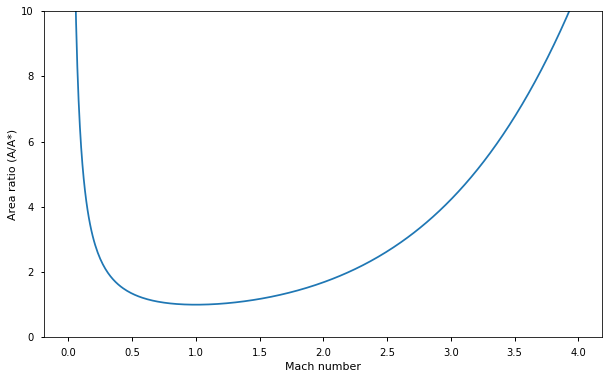

In [16]:
mach_numbers = np.arange(0.01, 4.0, 0.01)
fig, ax = plt.subplots(figsize = (10,6))
area_ratios  = list(map(lambda m: mach_to_area_throat_ratio(m, GAMMA), mach_numbers))
# kantrowitz_area_ratio = list(map(lambda m: kantrowitz_area_ratio(m, GAMMA), mach_numbers))

ax.plot(mach_numbers, area_ratios)
# ax.plot(mach_numbers, kantrowitz_area_ratio)
# ax.set_title('Isentropic contraction ratio at different Mach numbers')
ax.set_ylabel('Area ratio (A/A*)')
ax.set_xlabel('Mach number')
plt.ylim(0, 10)
plt.savefig("compression_ratio_to_mach.png")
plt.show()

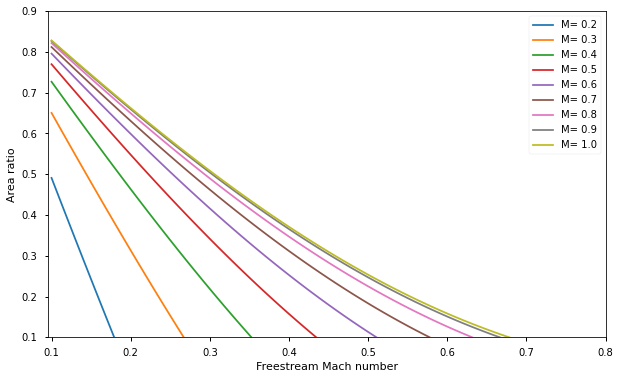

In [17]:
mach_numbers = np.arange(0.1, 0.75, 0.01)
fig, ax = plt.subplots(figsize = (10,6))
external_machs = np.arange(0.2, 1.1, 0.1)
handles = []

for mext in external_machs:
    area_ratios = list(map(lambda m: 1-mach_to_area_ratio(m, mext, GAMMA), mach_numbers))
    line, = ax.plot(mach_numbers, area_ratios, label=f"M= {mext:.1f}")
    handles.append(line)
    
    
ax.legend(loc='upper right', handles=handles)


# ax.set_title('Area ratio vs. freestream Mach number for a given constriction Mach number')
ax.set_ylabel('Area ratio')
ax.set_xlabel('Freestream Mach number')

plt.xlim(0.095, 0.8)
plt.ylim(0.1, 0.9)
plt.savefig("freestream_mach_vs_blockage.png")
plt.show()


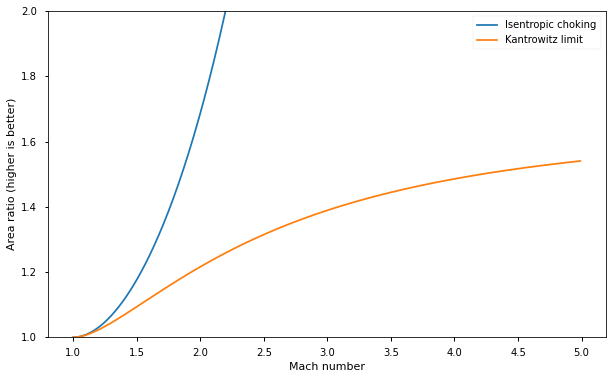

In [18]:
# kantrowitz limit comparison
mach_numbers = np.arange(1.0, 5.0, 0.01)
fig, ax = plt.subplots(figsize=(10,6))

area_ratio = list(map(lambda m: mach_to_area_throat_ratio(m, GAMMA), mach_numbers))
kantrowitz_limit = list(map(lambda m: 
    mach_to_area_throat_ratio(m, GAMMA)*normal_shock_stagnation_pressure_ratio(m, GAMMA), 
    mach_numbers
))

ax.plot(mach_numbers, area_ratio, label="Isentropic choking")
ax.plot(mach_numbers, kantrowitz_limit, label="Kantrowitz limit")
ax.legend(loc="upper right")
# ax.set_title("Comparison of isentropic compression and Kantrowitz limit")
ax.set_ylabel("Area ratio (higher is better)")
ax.set_xlabel("Mach number")

plt.ylim(1.0, 2.0)
plt.savefig("kantrowitz_vs_isentropic.png")
plt.show()

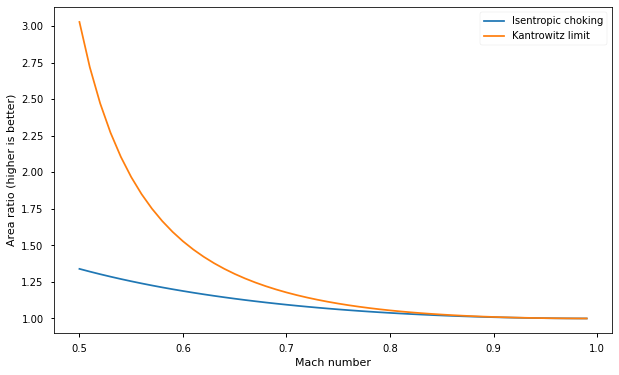

In [19]:
# kantrowitz limit comparison
mach_numbers = np.arange(0.5, 1.0, 0.01)
fig, ax = plt.subplots(figsize=(10,6))

area_ratio = list(map(lambda m: mach_to_area_throat_ratio(m, GAMMA), mach_numbers))
kantrowitz_limit = list(map(lambda m: 
    mach_to_area_throat_ratio(m, GAMMA)*normal_shock_stagnation_pressure_ratio(m, GAMMA), 
    mach_numbers
))

ax.plot(mach_numbers, area_ratio, label="Isentropic choking")
ax.plot(mach_numbers, kantrowitz_limit, label="Kantrowitz limit")
ax.legend(loc="upper right")
# ax.set_title("Comparison of isentropic compression and Kantrowitz limit, subsonic range")
ax.set_ylabel("Area ratio (higher is better)")
ax.set_xlabel("Mach number")

# plt.ylim(1.0, 2.0)

plt.show()

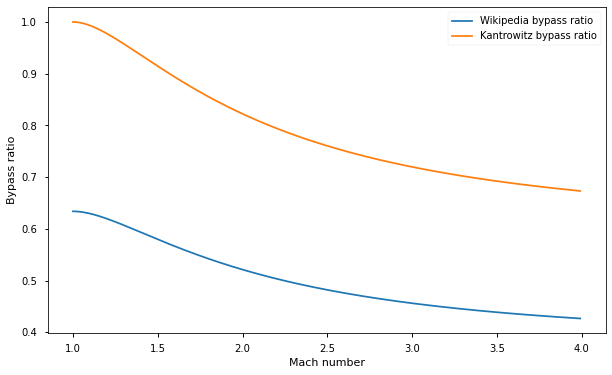

In [20]:
mach_numbers = np.arange(1.0, 4.0, 0.01)
fig, ax = plt.subplots(figsize=(10,6))

bypass_ratio = list(map(lambda m: wikipedia_bypass_ratio(m, GAMMA), mach_numbers))
isentropic_ratio = list(map(lambda m: 1/mach_to_area_throat_ratio(m, GAMMA), mach_numbers))
kantrowitz_limit = list(map(lambda m: 
    1/mach_to_area_throat_ratio(m, GAMMA)*1/normal_shock_stagnation_pressure_ratio(m, GAMMA), 
    mach_numbers
))
# stagnation_shock = list(map(lambda m: normal_shock_stagnation_pressure_ratio(m, 1.4), mach_numbers))

ax.plot(mach_numbers, bypass_ratio, label="Wikipedia bypass ratio")
# ax.plot(mach_numbers, isentropic_ratio, label="Isentropic bypass ratio")
ax.plot(mach_numbers, kantrowitz_limit, label="Kantrowitz bypass ratio")
# ax.plot(mach_numbers, stagnation_shock, label="Stagnation pressure ratio across shock")
ax.legend(loc="upper right")
# ax.set_title("Bypass ratio w.r.t. Mach Number")
ax.set_ylabel("Bypass ratio")
ax.set_xlabel("Mach number")

# plt.ylim(1.0, 2.0)
plt.savefig("kantrowitz_vs_wikipedia.png")
plt.show()

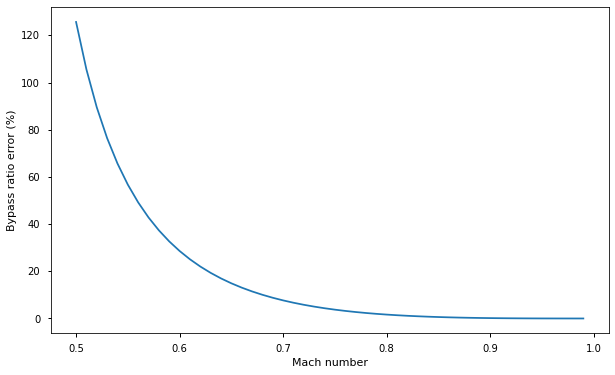

In [21]:
mach_numbers = np.arange(0.5, 1.0, 0.01)
fig, ax = plt.subplots(figsize=(10,6))
gamma = 1.4

bypass_error = list(map(lambda m: (kantrowitz_area_ratio(m, gamma)/mach_to_area_throat_ratio(m,gamma)-1)*100, mach_numbers))
ax.plot(mach_numbers, bypass_error)
# ax.set_title("Bypass ratio error w.r.t. subsonic Mach number")
ax.set_ylabel("Bypass ratio error (%)")
ax.set_xlabel("Mach number")

plt.savefig("kantrowitz_error.png")
plt.show()

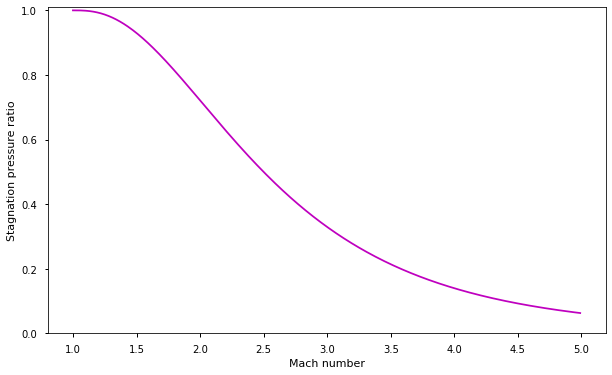

In [22]:
# pressure recovery plot
mach_numbers = np.arange(1.0, 5.0, 0.01)
fig, ax = plt.subplots(figsize=(10,6))

pressure_recovery = list(map(lambda m: normal_shock_stagnation_pressure_ratio(m, GAMMA), mach_numbers))
ax.plot(mach_numbers, pressure_recovery, "m")
ax.set_ylabel("Stagnation pressure ratio")
ax.set_xlabel("Mach number")
# ax.set_title("Total pressure recovery of normal shocks")
ax.set_ylim(0, 1.01)

plt.savefig("shock_pressure_recovery.png")
plt.show()

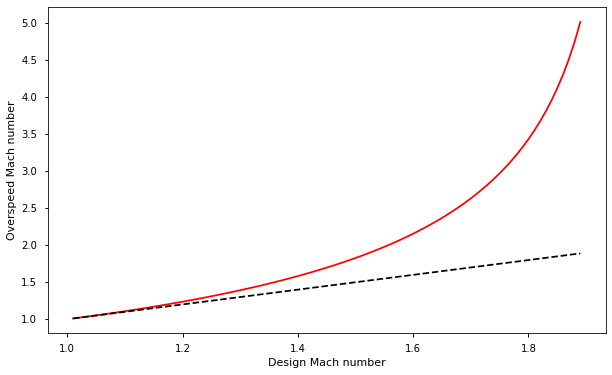

In [23]:
#overspeed requirement
mach_numbers = np.arange(1.01, 1.9, 0.01)
fix, ax = plt.subplots(figsize=(10, 6))

overspeed_mach = list(map(lambda m: kantrowitz_overspeed(m, GAMMA), mach_numbers))
ax.plot(mach_numbers, overspeed_mach, color="red")
ax.plot(mach_numbers, mach_numbers, 'k--')
ax.set_ylabel("Overspeed Mach number")
ax.set_xlabel("Design Mach number")
# ax.set_title("Required overspeed to start an inlet")
plt.savefig("overspeed.png")
plt.show()